In [1]:
# Data processing 
import numpy as np
import pandas as pd

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Over sampling and under sampling 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter 

# For evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
High_pr = pd.read_csv('/content/drive/MyDrive/data analytics/final project/high.csv')
High_pr.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0


In [6]:
High_pr = High_pr.drop(['SYMBOL1', 'TRADE_DATE', 'SEC_CODE'], axis=1)
High_pr.head()

,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0


In [8]:
High_pr_corr = High_pr.corr()
High_pr_corr

,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
MARKET,1.000000,-0.034048,0.045583,0.001102,-0.089998,0.001116,-0.099576,0.001093,-0.089226
VOLUME,-0.034048,1.000000,0.620277,0.777427,0.310333,0.777378,-0.026209,0.777434,-0.011380
TRADE_QTY,0.045583,0.620277,1.000000,0.449219,-0.013221,0.449198,0.080231,0.449170,0.075985
NO_OF_TRADES,0.001102,0.777427,0.449219,1.000000,0.288890,0.999997,-0.020228,0.999998,0.001323
HIGH,-0.089998,0.310333,-0.013221,0.288890,1.000000,0.289028,-0.086154,0.289048,-0.070636
BEST_ASK_PRICE,0.001116,0.777378,0.449198,0.999997,0.289028,1.000000,-0.020253,0.999999,0.001313
BEST_ASK_QTY,-0.099576,-0.026209,0.080231,-0.020228,-0.086154,-0.020253,1.000000,-0.020260,0.271098
BEST_BID_PRICE,0.001093,0.777434,0.449170,0.999998,0.289048,0.999999,-0.020260,1.000000,0.001308
BEST_BID_QTY,-0.089226,-0.011380,0.075985,0.001323,-0.070636,0.001313,0.271098,0.001308,1.000000


<Axes: >

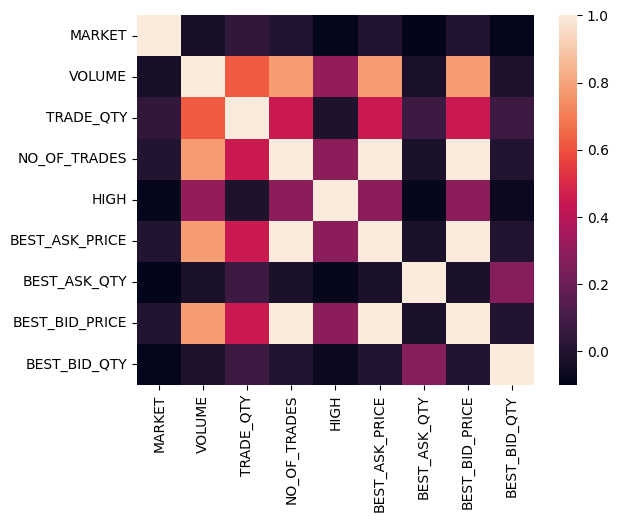

In [9]:
sns.heatmap(data=High_pr_corr)

In [11]:
High_pr.isnull().sum()

MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
HIGH              0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [12]:
X = High_pr.drop(['HIGH'], axis=1)

y = High_pr['HIGH']

In [13]:
# splitting the data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [14]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regression.predict(X_test)
y_pred

array([1.72040677, 0.81867829, 1.98864015, ..., 1.86313439, 0.50695411,
       1.51435584])

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
17783,0.47,1.720407
25579,0.15,0.818678
13639,1.28,1.988640
1885,1.15,2.077862
15132,2.11,1.459753


In [17]:
regression.score(X_test, y_test)

0.1769900037192652

### **Removing features with low variance method (the winner)**

In [18]:
from sklearn.feature_selection import VarianceThreshold

In [19]:
#get the variance for each column
variances = X.var()

# make selector 
selector = VarianceThreshold(threshold=5)

selector.fit(X_train)

# select the features 
selected_features = X.columns[selector.get_support()]

# printing the variance for every feature
print("Selected Features and Variance:")
for feature in selected_features:
    print(feature,": ",variances[feature])

# inetialize new variables for the training and testing X to train the model on it
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# training the model again depending on the new subset
regressor = LinearRegression()
reg = regressor.fit(X_train_selected, y_train)

Selected Features and Variance:
VOLUME :  91358547240.11235
TRADE_QTY :  21076797708.364723
NO_OF_TRADES :  4386.546281686843
BEST_ASK_QTY :  4546424799.745177
BEST_BID_QTY :  10164342907.438026


In [20]:
# Make predictions on the testing set
y_pred = reg.predict(X_test_selected)

In [21]:
# Calculate the regression metrics
mae_low_variance = mean_absolute_error(y_test, y_pred)
mse_low_variance = mean_squared_error(y_test, y_pred)
rmse_low_variance = mean_squared_error(y_test, y_pred, squared=False)
r2_low_variance = r2_score(y_test, y_pred)

# Print the regression metrics
print("\nRegression Metrics:")
print("MAE:", mae_low_variance)
print("MSE:", mse_low_variance)
print("RMSE:", rmse_low_variance)
print("R²:", r2_low_variance)


Regression Metrics:
MAE: 1.5126759290562883
MSE: 17.117146388541556
RMSE: 4.137287322454359
R²: 0.16617252144302386


### **SelectKBest method**

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# instantiate the feature selection model
selector = SelectKBest(f_regression, k=8)

# fit the model on the training data
selector.fit(X_train, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [52]:
# make predictions on the testing set
y_pred = model.predict(X_test_selected)

In [53]:
# calculate regression metrics
mae_KBest = mean_absolute_error(y_test, y_pred)
mse_KBest = mean_squared_error(y_test, y_pred)
rmse_KBest = mean_squared_error(y_test, y_pred, squared=False)
r2_KBest = r2_score(y_test, y_pred)

# print the selected features and regression metrics
print("Selected features:", X.columns[selector.get_support()])
print("MAE:", mae_KBest)
print("MSE:", mse_KBest)
print("RMSE:", rmse_KBest)
print("R2:", r2_KBest)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')
MAE: 1.5148651237854636
MSE: 16.89508075453496
RMSE: 4.110362606210669
R2: 0.1769900037192652


### **Sequential Feature Selection method**

In [54]:
from sklearn.feature_selection import SequentialFeatureSelector

In [64]:
# spliting the dataset to training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# using the Sequential Feature Selection method to filter owr dataset
sfs = SequentialFeatureSelector(model, n_features_to_select=6, direction='forward') #forward
sfs.fit(X_train, y_train)


selected_features = X.columns[sfs.get_support()] # returns true of false depending on the chosen features
print("Selected features:", selected_features)

# editing the X_train and testing to make it work on the chosen features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# train the model
model = LinearRegression()
model.fit(X_train_selected, y_train)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY'],
      dtype='object')


LinearRegression()

In [65]:
y_pred = model.predict(X_test_selected)

In [66]:
# Calculate the regression metrics
mae_Sequential_Feature = mean_absolute_error(y_test, y_pred)
mse_Sequential_Feature = mean_squared_error(y_test, y_pred)
rmse_Sequential_Feature = mean_squared_error(y_test, y_pred, squared=False)
r2_Sequential_Feature = r2_score(y_test, y_pred)

print("Regression Metrics:")
print("MAE:", round(mae_Sequential_Feature, 3))
print("MSE:", round(mse_Sequential_Feature, 3))
print("RMSE:", round(rmse_Sequential_Feature, 3))
print("R²:", round(r2_Sequential_Feature, 3))

Regression Metrics:
MAE: 1.503
MSE: 16.932
RMSE: 4.115
R²: 0.175


### ***Testing the results***

In [68]:
df_comparing = pd.DataFrame({'method': ['low variance', 'SelectKBest', 'Sequential Feature'],
                            'R2': [r2_low_variance, r2_KBest, r2_Sequential_Feature],
                            'MAE': [mae_low_variance, mae_KBest, mae_Sequential_Feature],
                            'MSE': [mse_low_variance, mse_KBest, mse_Sequential_Feature],
                            'RMSE': [rmse_low_variance, rmse_KBest, rmse_Sequential_Feature]})
df_comparing

,method,R2,MAE,MSE,RMSE
0,low variance,0.166173,1.512676,17.117146,4.137287
1,SelectKBest,0.176990,1.514865,16.895081,4.110363
2,Sequential Feature,0.175171,1.503089,16.932432,4.114904


<Axes: xlabel='method', ylabel='R2'>

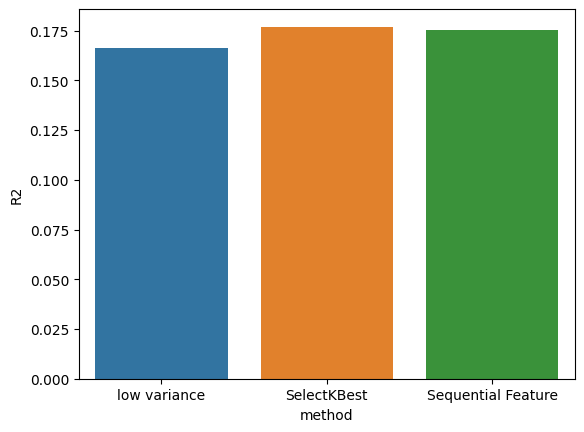

In [69]:
sns.barplot(x='method', y = 'R2', data = df_comparing)